# Introduction
Hi, I made this jupyter notebook so that you can follow along with some of the graphs and ideas in the essay. I won't go into extreme detail about the code, but I suppose that you can always ask me.

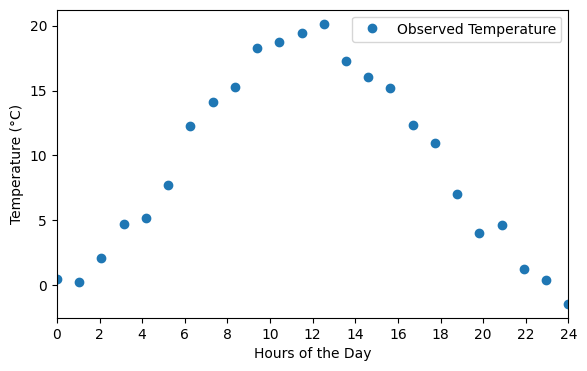

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)  # For reproducibility
hours = np.linspace(0, 24, 24)  # Hours of the day

# True temperature model (sinusoidal variation)
true_temp = 10 + -10 * np.cos((2 * np.pi / 24) * hours)  # Base temp + daily variation

# Add some random noise
noise = np.random.normal(0, 1, hours.shape)
observed_temp = true_temp + noise

# Plot the data
plt.figure(figsize=(6.6, 4))
plt.plot(hours, observed_temp, 'o', label='Observed Temperature')
plt.xlabel('Hours of the Day')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 2))
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [35]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Initial guess for the parameters
initial_guess = [8, -5, 20] 
result_vector = [initial_guess]

def model_func(params, t):
    a, b, c = params
    return a + b * np.cos((2 * np.pi / c) * t)

def error(params, t, y):
    return y - model_func(params, t)

def rmse(params, t, y):
    return np.sqrt(np.mean(error(params, t, y) ** 2))

def callback(params):
    current_rmse = rmse(params, hours, observed_temp)
    result = (params[0], params[1], params[2],current_rmse)
    result_vector.append(result)
    print(result)

print("a, b, c, RMSE")



# Perform the optimization
result = minimize(rmse, initial_guess, args=(hours, observed_temp), callback=callback)

a, b, c, RMSE
(10.166523337364197, -6.305761635303497, 22.930780053138733, 2.5722098823590613)
(10.719671737484127, -7.054258252857231, 23.81153869309824, 2.2550592935713096)
(10.529327512328795, -7.980633001981664, 23.948135172218173, 1.6728003125328899)
(9.93093766426463, -9.593756462036986, 23.81139015079183, 0.8682388624951849)
(9.853962046732805, -9.611162332942202, 23.559303125143057, 0.8654213754090245)
(9.875820535607286, -9.606450761317967, 23.573334520456807, 0.8602596705992589)
(9.928254705203551, -9.613363299673061, 23.602870611440885, 0.8525521747406457)
(9.97933455547026, -9.592917085549741, 23.62414401391213, 0.8503138653451165)
(9.977899411835374, -9.613489966907471, 23.62801073294424, 0.8502903522173034)
(9.97723889377349, -9.60510667607485, 23.62574601417582, 0.8502663622912906)
(9.977297117989943, -9.604994609079958, 23.625745458903854, 0.8502663563227849)


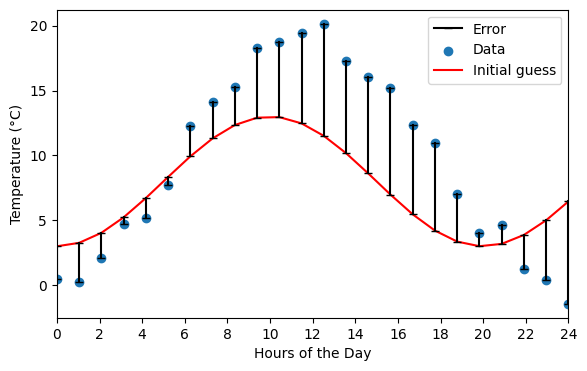

In [36]:
# RSME illustration

y_initial = model_func(initial_guess, hours)

diff = error(initial_guess, hours, observed_temp)
line_list_x = []
line_list_y = []
plt.figure(figsize=(6.6, 4))
for n in range(hours.size):
    line_y = [observed_temp[n], observed_temp[n]-diff[n]]
    line_x = [hours[n], hours[n]]
    line_list_x.append(line_x)
    line_list_y.append(line_y)
    if n == 0:
        plt.plot(line_x, line_y, color='black', marker="_", zorder=3, label="Error")
    else:
        plt.plot(line_x, line_y, color='black', marker="_", zorder=3)



plt.scatter(hours, observed_temp, label='Data', zorder=2)
plt.plot(hours, y_initial, color='red', label='Initial guess', zorder=2)
plt.xlabel('Hours of the Day')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 2))
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

[8, -5, 20]
(10.529327512328795, -7.980633001981664, 23.948135172218173)
(9.977899411835374, -9.613489966907471, 23.62801073294424)


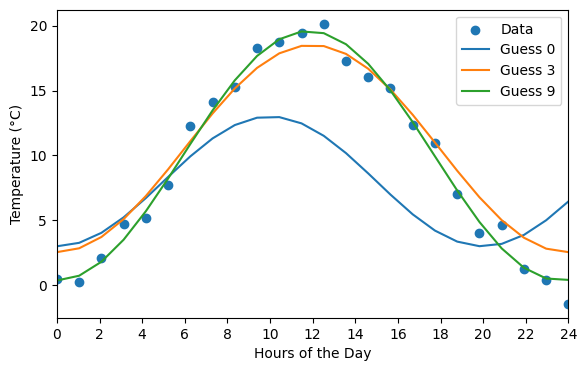

In [37]:
# Regression conversion 

y_initial = model_func(initial_guess, hours)

diff = error(initial_guess, hours, observed_temp)
line_list_x = []
line_list_y = []
plt.figure(figsize=(6.6, 4))
plt.scatter(hours, observed_temp, label='Data', zorder=2)

for n in [0, 3, 9]:
    print(result_vector[n][0:3])
    y_guess = model_func(result_vector[n][0:3] , hours)
    plt.plot(hours, y_guess, label="Guess {}".format(n))

plt.xlabel('Hours of the Day')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 2))
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


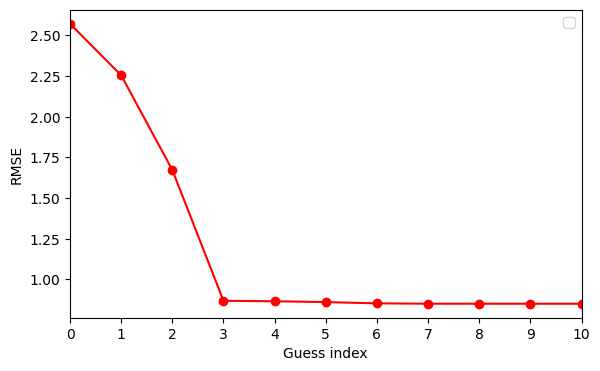

In [38]:
# rmse plot

plt.figure(figsize=(6.6, 4))
rmse = elements = [tupleObj[3] for tupleObj in result_vector[1::]]
plt.plot(rmse, color='red', marker="o")
plt.xlabel('Guess index')
plt.xlim(0, 1)
plt.xticks(np.arange(0, 11, 1))
plt.ylabel('RMSE')
plt.legend()
plt.show()

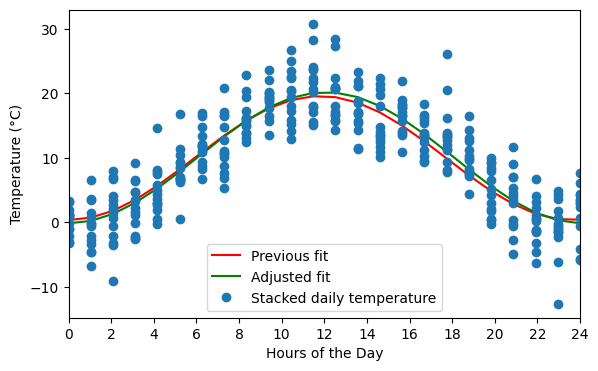

In [39]:
# data with more uncertainty
from scipy.optimize import curve_fit

np.random.seed(42)  # For reproducibility
hours = np.linspace(0, 24, 24)  # Hours of the day

# True temperature model (sinusoidal variation)
true_temp = 10 + -10 * np.cos((2 * np.pi / 24) * hours)  # Base temp + daily variation

def temp_norm_dist(t):
    return 10 + -10 * np.cos((2 * np.pi / 24) * t)

def fit_func(t, a, b, c):
    return a + b * np.cos((2 * np.pi / c) * t)

uncer_temp_data = []
uncer_temp_hours = []
for days in range(14):
    noise = np.random.normal(0, 4, hours.shape)
    daily_data = temp_norm_dist(hours) + noise
    uncer_temp_data.append(daily_data)
    uncer_temp_hours.append(hours)
uncer_temp_hours = np.array(uncer_temp_hours).flatten()
uncer_temp_data = np.array(uncer_temp_data).flatten()


old_y_fit = model_func(result_vector[10][0:3] , hours)
popt, copt = curve_fit(fit_func, uncer_temp_hours, uncer_temp_data)
new_y_fit = fit_func(hours, *popt)

# Plot the data
plt.figure(figsize=(6.6, 4))
plt.plot(hours, old_y_fit, label="Previous fit", color="red")
plt.plot(hours, new_y_fit, label="Adjusted fit", color="green")
plt.plot(uncer_temp_hours, uncer_temp_data, 'o', label='Stacked daily temperature')
plt.plot()
plt.xlabel('Hours of the Day')
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 2))
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()




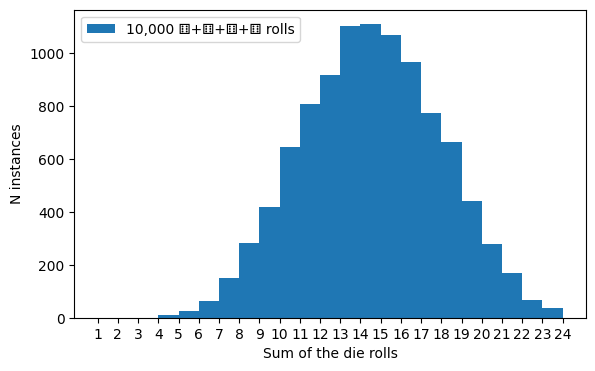

In [40]:
# repeated sum of fair dice

values = [1, 2, 3, 4, 5, 6]
probs = [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]
sample = np.random.choice(values, p=probs)

def die_roll(d):
    values = np.arange(1, d+1, 1)
    return np.random.choice(values)

sum_result = []
for n in range(10000):
    die_sum = die_roll(6) + die_roll(6) + die_roll(6) + die_roll(6)
    sum_result.append(die_sum)
n_bins = 2

plt.figure(figsize=(6.6, 4))
plt.hist(sum_result, bins=range(1,25), label="10,000 ⚅+⚅+⚅+⚅ rolls")
plt.xticks(np.arange(1, 25, 1))
plt.xlabel("Sum of the die rolls")
plt.ylabel("N instances")
plt.legend()
plt.show()

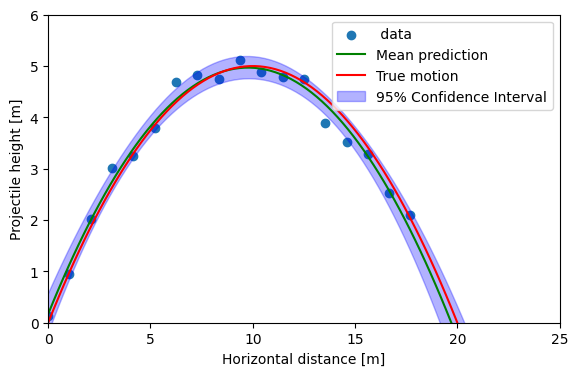

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Kernel

# Define the custom quadratic bias kernel again to use in this environment
class QuadraticBiasKernel(Kernel):
    def __init__(self, constant=1.0):
        self.constant = constant

    def __call__(self, X, Y=None, eval_gradient=False):
        if Y is None:
            Y = X
        quadratic_term = (self.constant + np.dot(X, Y.T)) ** 2
        if eval_gradient:
            gradient = 2 * (self.constant + np.dot(X, Y.T))
            return quadratic_term, gradient[:, :, np.newaxis]
        return quadratic_term

    def diag(self, X):
        return np.diag(self(X))

    def is_stationary(self):
        return False

def projectile_motion(x):
    """Calculate the height (y) of a tennis ball based on horizontal distance (x)."""
    return -0.05 * x**2 + x

# Generate synthetic quadratic data: y = x^2 + noise
np.random.seed(42)
X_train = np.linspace(0, 25, 25).reshape(-1, 1)
y_train = projectile_motion(X_train) + np.random.normal(0, 0.25, X_train.shape)  # Quadratic with noise

partial_n = 18
X_train = X_train[:partial_n]
y_train = y_train[:partial_n]

# Define and fit the Gaussian Process with the custom quadratic kernel
kernel = QuadraticBiasKernel(constant=1.0) 
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)
gp.fit(X_train, y_train)

# Generate test points for prediction
X_test = np.linspace(0, 25, 100).reshape(-1, 1)
y_pred, y_std = gp.predict(X_test, return_std=True)

# true function
y_true = projectile_motion(X_test)

# Plot the data, the GP mean prediction, and the 95% confidence interval
plt.figure(figsize=(6.6, 4))
plt.scatter(X_train, y_train, label=' data')
plt.plot(X_test, y_pred, color='g', label='Mean prediction')
plt.plot(X_test, y_true, color='red', label="True motion")
plt.fill_between(X_test.ravel(), 
                 y_pred - 1.96 * y_std, 
                 y_pred + 1.96 * y_std, 
                 alpha=0.3, color='blue', label='95% Confidence Interval')

# plt.title('Gaussian Process Regression on projectile motion')
plt.xlabel('Horizontal distance [m]')
plt.ylabel('Projectile height [m]')
plt.xlim(0, 25)
plt.ylim(0, 6)
plt.legend()
plt.show()


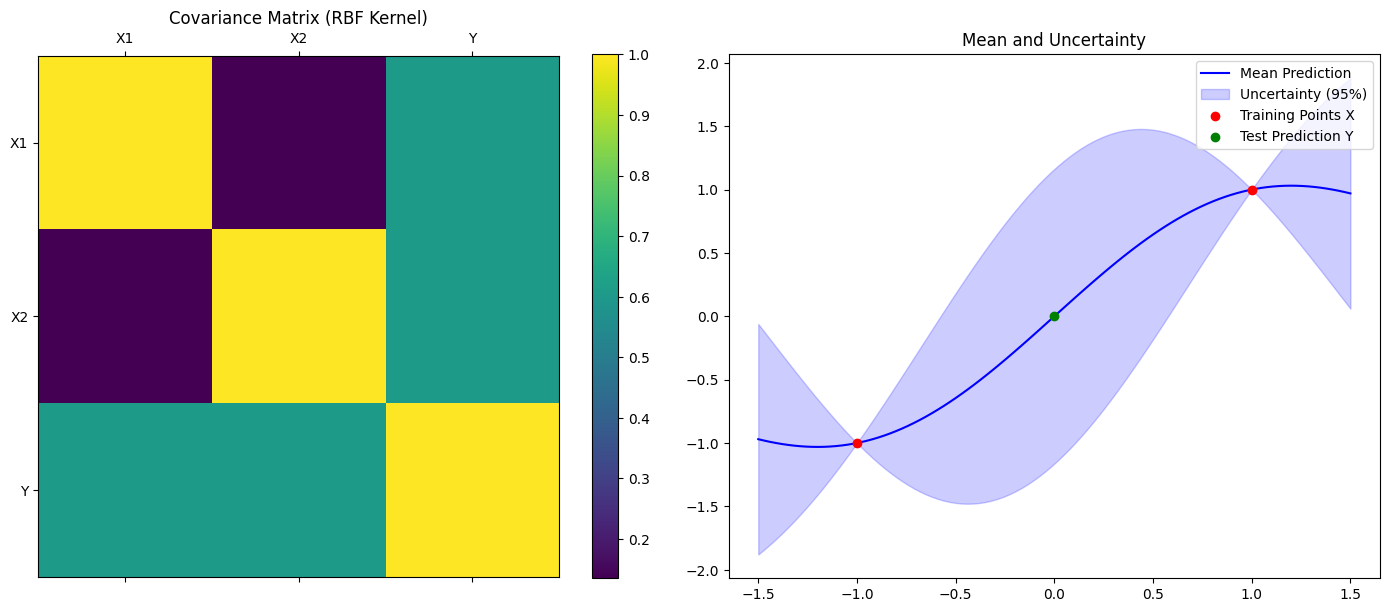

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the RBF Kernel
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    """Radial Basis Function (RBF) kernel (a.k.a Gaussian kernel)"""
    sqdist = np.sum(x1**2, 1).reshape(-1,1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# Set up the points
X_train = np.array([[-1.0], [1.0]])  # Two training points
Y_train = np.array([-1.0, 1.0])  # Corresponding y values for x = -1 and x = 1
X_test = np.array([[0.0]])  # One test point in the middle
X_full = np.vstack((X_train, X_test))  # Combine them for full covariance matrix

# Compute the covariance matrix using the RBF kernel
K = rbf_kernel(X_full, X_full)

# Define the covariance between train points (K_train), and between train and test points (K_s)
K_train = K[:2, :2]  # Covariance between training points
K_s = K[:2, 2:]      # Covariance between training points and test point
K_ss = K[2:, 2:]     # Covariance at the test point

# Assume zero mean for prior GP
mu_train = np.zeros(len(X_train))
mu_s = np.zeros(1)  # Prior mean for the test point

# Add noise to the diagonal (to simulate observation noise, for stability)
noise_variance = 1e-8
K_train += noise_variance * np.eye(len(X_train))

# Compute posterior mean and covariance
K_inv = np.linalg.inv(K_train)
# Update the training points to follow the line y = x


# Compute posterior mean and covariance based on the new y values
mu_post = mu_s + K_s.T @ K_inv @ Y_train
cov_post = K_ss - K_s.T @ K_inv @ K_s

# Visualize the updated GP with new training points
fig = plt.figure(figsize=(14, 6))

# Subplot 1: Covariance Matrix Visualization
ax1 = fig.add_subplot(121)
cax = ax1.matshow(K, cmap='viridis')
plt.colorbar(cax)
ax1.set_title('Covariance Matrix (RBF Kernel)')
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['X1', 'X2', 'Y'])
ax1.set_yticks([0, 1, 2])
ax1.set_yticklabels(['X1', 'X2', 'Y'])

# Subplot 2: Mean and Uncertainty
mu_star = K_star[:, :2] @ K_inv @ Y_train
cov_star = rbf_kernel(X_plot, X_plot) - K_star[:, :2] @ K_inv @ K_star[:, :2].T
std_star = np.sqrt(np.diag(cov_star))

# Plot GP mean and uncertainty
ax2 = fig.add_subplot(122)
ax2.plot(X_plot, mu_star, 'b-', label="Mean Prediction")
ax2.fill_between(X_plot.flatten(), 
                 mu_star - 1.96 * std_star, 
                 mu_star + 1.96 * std_star, 
                 alpha=0.2, color='blue', label="Uncertainty (95%)")
ax2.scatter(X_train, Y_train, color='red', zorder=5, label="Training Points X")
ax2.scatter(X_test, mu_post, color='green', zorder=5, label="Test Prediction Y")
ax2.set_title('Mean and Uncertainty')
ax2.legend()

plt.tight_layout()
plt.show()


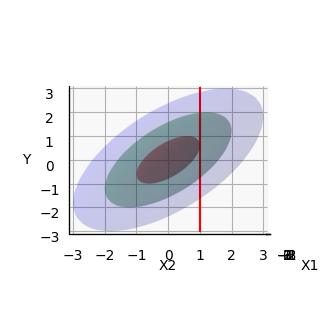

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to plot ellipsoid
def plot_cov_ellipse(cov, pos, ax, nstd=1, **kwargs):
    # Eigenvalue decomposition to get the axes of the ellipsoid
    U, s, rotation = np.linalg.svd(cov)
    
    # Radii for the ellipsoid (scaled by nstd)
    radii = np.sqrt(s) * nstd

    # Create a mesh for ellipsoid plotting
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radii[0] * np.outer(np.cos(u), np.sin(v))
    y = radii[1] * np.outer(np.sin(u), np.sin(v))
    z = radii[2] * np.outer(np.ones_like(u), np.cos(v))

    # Rotate the ellipsoid data to align with covariance orientation
    for i in range(len(x)):
        for j in range(len(x)):
            [x[i, j], y[i, j], z[i, j]] = np.dot([x[i, j], y[i, j], z[i, j]], rotation) + pos

    # Plot the surface
    ax.plot_surface(x, y, z, rstride=4, cstride=4, label= kwargs.get('label'), color=kwargs.get('color', 'c'), alpha=kwargs.get('alpha', 0.2))

# Mean vector (training points + test point)
mean = np.zeros(3)

# Covariance matrix (3x3)
# Assuming K is the covariance matrix already computed for the 3 points
covariance_matrix = K

# Set up the plot
fig = plt.figure(figsize=(6.6, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot ellipsoids for 1, 2, and 3 standard deviations
plot_cov_ellipse(covariance_matrix, mean, ax, nstd=1, color='r', alpha=0.3, label=r'$1\sigma$')
plot_cov_ellipse(covariance_matrix, mean, ax, nstd=2, color='g', alpha=0.2, label=r'$2\sigma$')
plot_cov_ellipse(covariance_matrix, mean, ax, nstd=3, color='b', alpha=0.1, label=r'$3\sigma$')

# Set plot labels and limits
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

test_line_xtest = np.linspace(-3, 3, 2)
test_line_x1 = np.ones(test_line_xtest.shape)*-1
test_line_x2 = np.ones(test_line_xtest.shape)*1
ax.plot(test_line_x1, test_line_x2, test_line_xtest, color="r", label="Y | X")
ax.set_proj_type('ortho')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=0, azim=0, roll=0)

# plt.legend(loc="center right")

plt.show()
